## Assignment 2: $k$ Nearest Neighbor

### Do any four.

I did 1, 2, 3, and 6

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy as skim
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?

The difference between regression and classification is the type of outcome being predicted. In classification the target variable is categorical so the model predicts a label or class. Performance is measured using tools like confusion matrix and accuracy, which measure how often the predicted labels match the true labels. In regression the target variable is numeric so the model predicts predicts a continuous value. Performance is measured using residuals and mean squared error, which quantify how far predicted values are from their true values.

2. What is a confusion table/matrix? What does it help us understand about a model's performance? 

A confusion matrix is a table that compares the true labels with the predicted labels from a classification model. It cross tabulates actual outcomes against predicted outcomes to show where the model made correct predictions and where it made mistakes. It helps us understand a model's performance because it shows how often predictions match the true values and what types of errors the model makes which helps us to evaluate whether the model is working well.

3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

Accuracy is is the proportion of predictions the classifier gets correct. It is calculated summing the correctly predicted cases/descending diagonal and then dividing by the total number of observations. Accuracy is not always enough because it simplifies the confusion matrix into a single number and doesn’t fully show how the model is making mistakes or where predictions go wrong.

4. What does the root mean squared error quantify about a particular model?

Root mean squared error (RMSE) measures how far a model’s predicted values are from the true values on average. It quantifies the distance between the actual outcomes and the predicted outcomes basically giving a summary of how much error the model makes in a regression task. A lower RMSE means the model’s predictions are closer to the true values so that means it's more accurate.

5. What are overfitting and underfitting? 

Overfitting is when a model is too sensitive to individual data points, usually when k is too low, making the model to fit the training data too closely. Underfitting is when k is too high so the model averages over too many observations and becomes too simple which ends up missing important patterns in the data. The goal is to avoid both by choosing a model with the right level of complexity.

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?

Splitting the data into training and testing sets improves model performance because it lets us evaluate the model on data it has not already seen. The model is trained by using the training set, while accuracy or RMSE is calculated on the test set to simulate how the model would perform on new/future cases. Choosing k based on test performance helps prevent overfitting since evaluating the model only on training data can make it seem more accurate than it actually is. Using a tain test split helps pick a value of k that generalizes better and outputs more predictions that are reliable.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

In classification, we can either predict a class label or a probability distribution over class labels. Predicting a class label is easy to interpret because it gives a clear final decision about which category an observation belongs to. A weakness is that it does not show how confident the model is in that prediction.
Predicting a probability distribution provides more information because it shows the likelihood of each possible class, which helps us understand uncertainty in the model’s predictions. A weakness is that probabilities can be harder to interpret and require choosing a cutoff or decision rule to turn them into a final classification.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

### Q2, 1

In [133]:
mines = pd.read_csv('/Users/clairicelou/Documents/DS3021/scratchpad/data/land_mines.csv', encoding='latin1')

mines.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [134]:
mines.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [135]:
mines.isna().sum()

voltage      0
height       0
soil         0
mine_type    0
dtype: int64

In [136]:
# target label
mines['mine_type'].value_counts()

mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64

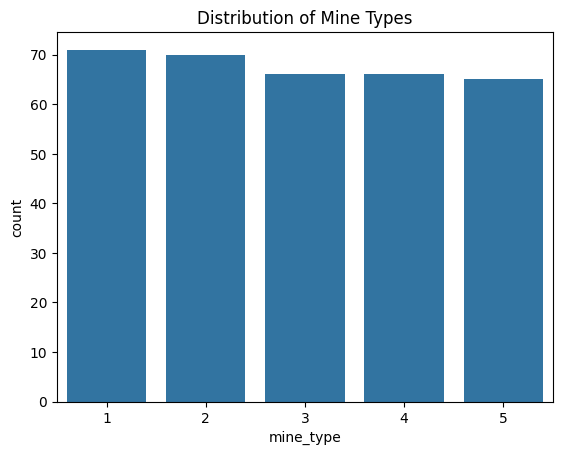

In [137]:
sns.countplot(x='mine_type', data=mines)
plt.title("Distribution of Mine Types")
plt.show()

<Axes: xlabel='voltage', ylabel='Count'>

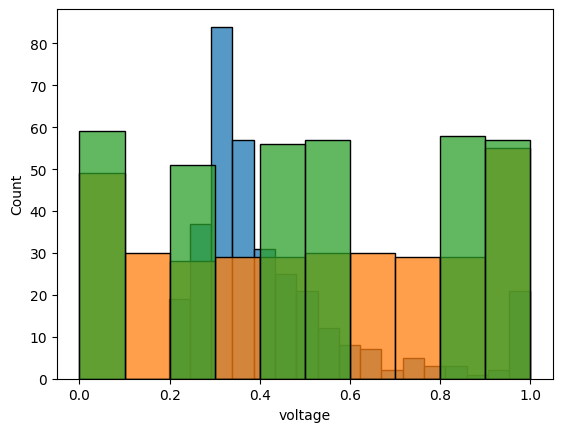

In [138]:
# histograms with a single variable
sns.histplot(mines['voltage'])
sns.histplot(mines['height'])
sns.histplot(mines['soil'])

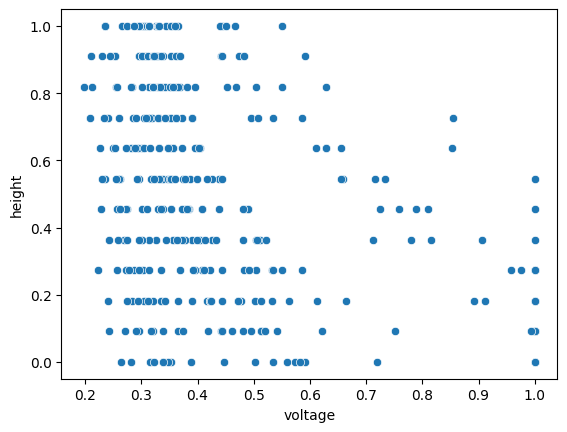

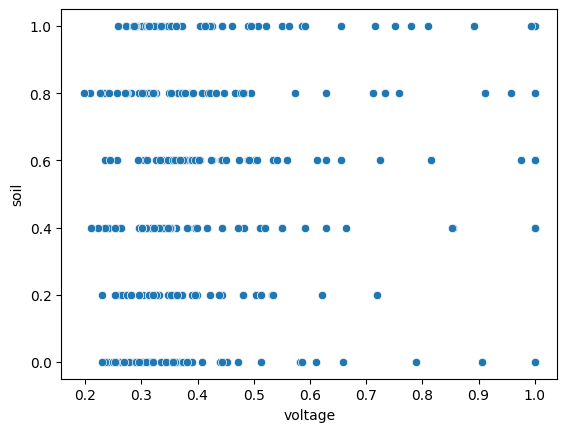

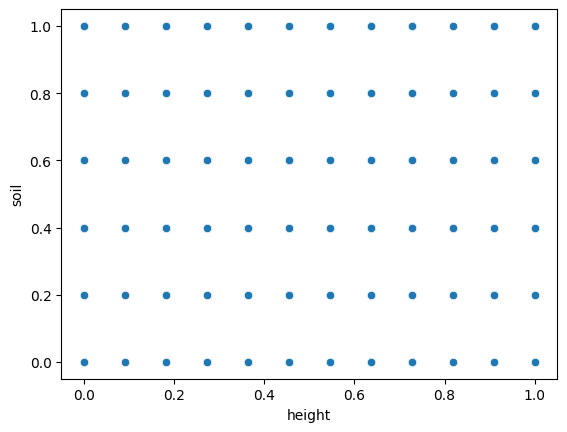

In [139]:
# relationships between the features
sns.scatterplot(data=mines, x='voltage', y='height')
plt.show()
sns.scatterplot(data=mines, x='voltage', y='soil')
plt.show()
sns.scatterplot(data=mines, x='height', y='soil')
plt.show()

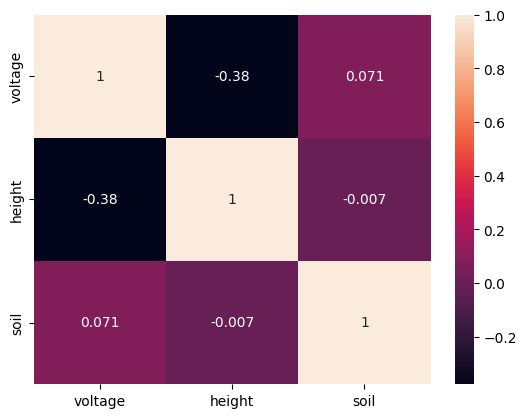

In [140]:
# correlation
mines[['voltage','height','soil']].corr()
sns.heatmap(mines[['voltage','height','soil']].corr(),annot=True)
plt.show()

### Q2, 2

In [142]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [143]:
u = mines[['voltage', 'height', 'soil']]   
y = mines['mine_type']                     

In [144]:
u_train, u_val, y_train, y_val = train_test_split(u, y, test_size=0.5, random_state=100)

In [145]:
def MinMaxScaler(x):
    return (x - min(x)) / (max(x) - min(x))

u = u.apply(MinMaxScaler)

### Q2, 3

In [125]:
k = 5

model = KNeighborsClassifier(n_neighbors=k)
model.fit(u_train, y_train)

y_hat = model.predict(u_val)

In [146]:
model.score(u_val, y_val)

0.27218934911242604

In [147]:
# selecting k
k_grid = np.array([(2*k+1) for k in range(0,25)])  
accuracies = []

for k in k_grid:

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(u_train, y_train)

    acc = model.score(u_val, y_val)   
    accuracies.append(acc)

    print(f"Accuracy for {k} neighbors is {acc}")

Accuracy for 1 neighbors is 0.3254437869822485
Accuracy for 3 neighbors is 0.3727810650887574
Accuracy for 5 neighbors is 0.3609467455621302
Accuracy for 7 neighbors is 0.3254437869822485
Accuracy for 9 neighbors is 0.33727810650887574
Accuracy for 11 neighbors is 0.3668639053254438
Accuracy for 13 neighbors is 0.39644970414201186
Accuracy for 15 neighbors is 0.34911242603550297
Accuracy for 17 neighbors is 0.35502958579881655
Accuracy for 19 neighbors is 0.31952662721893493
Accuracy for 21 neighbors is 0.3076923076923077
Accuracy for 23 neighbors is 0.31952662721893493
Accuracy for 25 neighbors is 0.3136094674556213
Accuracy for 27 neighbors is 0.35502958579881655
Accuracy for 29 neighbors is 0.33136094674556216
Accuracy for 31 neighbors is 0.35502958579881655
Accuracy for 33 neighbors is 0.33136094674556216
Accuracy for 35 neighbors is 0.33727810650887574
Accuracy for 37 neighbors is 0.33136094674556216
Accuracy for 39 neighbors is 0.3076923076923077
Accuracy for 41 neighbors is 0.26

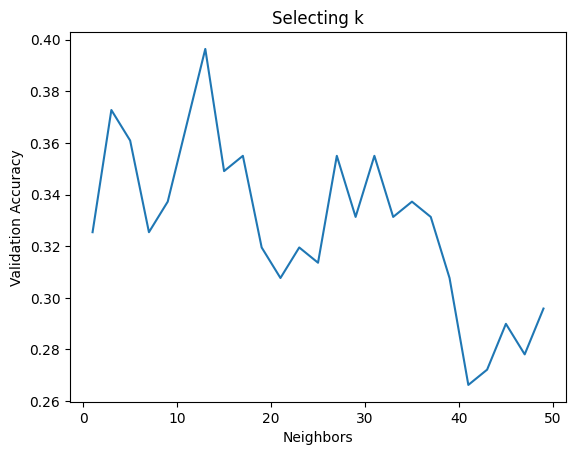

In [148]:
sns.lineplot(x=k_grid, y=accuracies)
plt.xlabel("Neighbors")
plt.ylabel("Validation Accuracy")
plt.title("Selecting k")
plt.show()

Following the lecture notes, I used multiple values of k using a grid of odd neighbor counts. Because the land mines dataset is on the smaller side, I restricted k so that it stayed smaller than the number of training observations. I selected the value of k that maximized validation accuracy.

### Q2, 4

In [150]:
pd.crosstab(y_val, y_hat)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_hat)

array([[25,  0,  8,  2,  3],
       [ 0, 22,  9,  0,  4],
       [ 5,  0, 10,  7, 11],
       [11,  2, 13,  6,  3],
       [ 8,  1, 11,  5,  3]])

In [151]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_hat)
print(accuracy)

0.3905325443786982


The model isn’t very accurate overall, the accuracy is about 39%. Some mine types stand out with more correct predictions along the diagonal of the confusion matrix, while others are often confused with different types, making them harder for the model to classify.

### Q2, 5

I'd advise someone to use this model by just a rough guide to help figure out which areas might have certain types of mines but people should not rely on it alone. Even though it makes some correct predictions, the confusion matrix shows that it makes many mistakes for certain mine types. Misclassifying a mine could be dangerous so experts should still check everything carefully before doing anything. The model could help suggest likely mine types where to focus to, but final decisions should be made by professionals.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

### Q3, 1

In [158]:
USA = pd.read_csv('/Users/clairicelou/Documents/DS3021/scratchpad/data/USA_cars_datasets.csv', encoding='latin1')

USA.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [159]:
USA = USA[['price', 'year', 'mileage']]

In [160]:
USA.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [161]:
USA.isna().sum()

price      0
year       0
mileage    0
dtype: int64

There are no missing values.

In [162]:
USA.shape

(2499, 3)

### Q3, 2

In [163]:
def minmax(x):
    u = (x - min(x)) / (max(x) - min(x))
    return u

In [164]:
y = USA['price']
x = USA[['year', 'mileage']]

In [165]:
u = x.apply(minmax)

In [166]:
u.head()

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537


### Q3, 3

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
u_train, u_val, y_train, y_val = train_test_split(u, y, test_size=0.2, random_state=100)

### Q3, 4

k = 3, MSE = 126118037.16488889


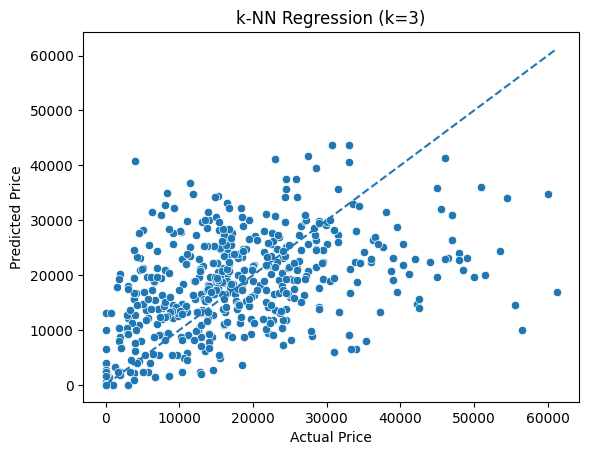

k = 10, MSE = 110653044.18681999


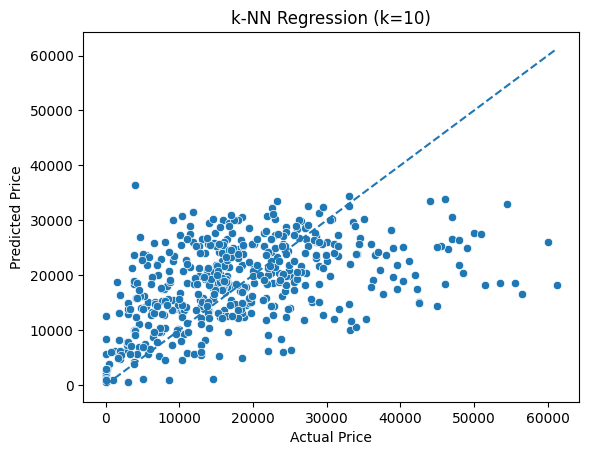

k = 25, MSE = 103174289.15223679


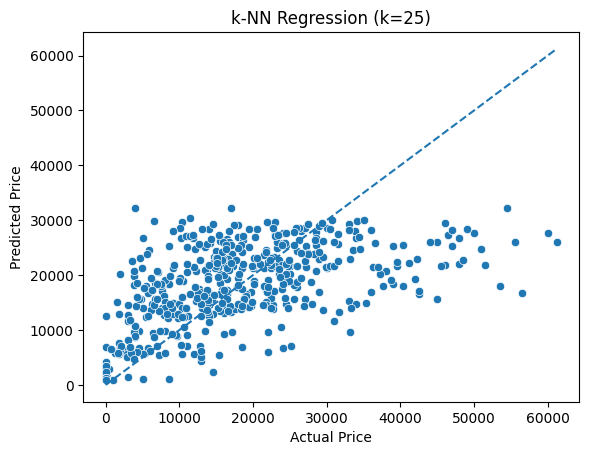

k = 50, MSE = 99685489.499396


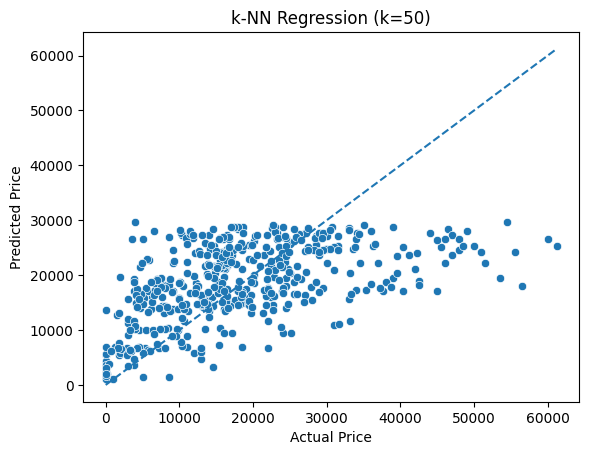

k = 100, MSE = 98276515.02300058


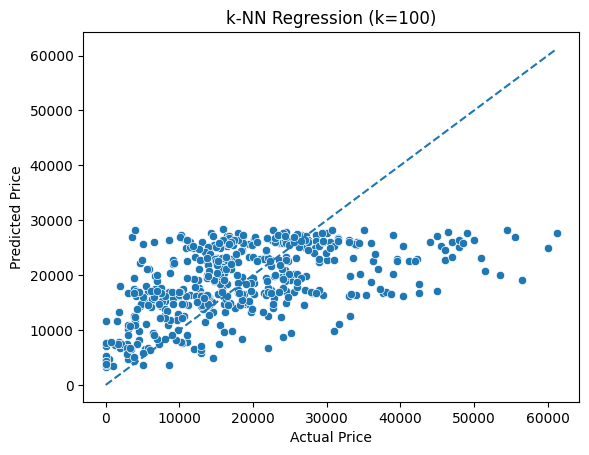

k = 300, MSE = 100477298.914212


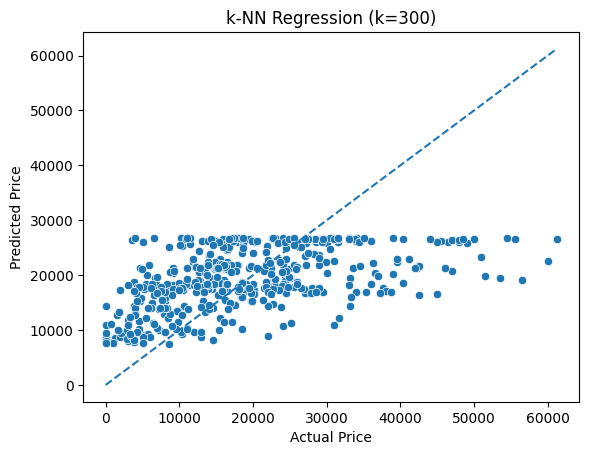

In [169]:
k_values = [3, 10, 25, 50, 100, 300]
mses = []

for k in k_values:

    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(u_train, y_train)
    y_hat = model.predict(u_val)
    mse = mean_squared_error(y_val, y_hat)
    mses.append(mse)
    print(f"k = {k}, MSE = {mse}")

    sns.scatterplot(x=y_val, y=y_hat)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k-NN Regression (k={k})")

    lo = min(y_val.min(), y_hat.min())
    hi = max(y_val.max(), y_hat.max())
    plt.plot([lo, hi], [lo, hi], linestyle="--")

    plt.show()

As we increase k, I notice that the predictions become smoother because they are averaged over more neighbors. The points move closer to the diagonal at first but as it increases the predictions become smooth and cluster near the mean price.

### Q3, 5

In [170]:
k_optimal = k_values[np.argmin(mses)]
print(k_optimal)

100


### Q3, 6

For a small k the model overfits which captures too much detail in the training data so predictions are noisy. For a large k the model underfits giving predictions that are too general and don’t match the actual prices well. The best k balances these, giving predictions close to the actual values without too much noise.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

### Q6, 1

In [197]:
df = pd.read_csv('/Users/clairicelou/Documents/DS3021/scratchpad/data/airbnb_hw.csv', encoding='latin1')

df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [198]:
airbnb = df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

airbnb.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


### Q6, 2

In [199]:
missing_reviews = airbnb['Review Scores Rating'].isnull()
airbnb_missing_reviews = airbnb.loc[missing_reviews]

### Q6, 3

In [200]:
airbnb = airbnb.dropna(axis=0, how='any')

### Q6, 4

In [201]:
airbnb.dtypes

Review Scores Rating    float64
Price                       str
Beds                    float64
dtype: object

In [202]:
airbnb['Price'] = (airbnb['Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float))

In [203]:
def minmax(x):
    u = (x - min(x)) / (max(x) - min(x))
    return u

In [204]:
y = airbnb['Review Scores Rating']
x = airbnb[['Price', 'Beds']]

In [205]:
u = x.apply(minmax)

In [206]:
u_train, u_test, y_train, y_test = train_test_split(u, y, test_size=.2, random_state=100)

[Text(0, 0.5, 'MSE'), Text(0.5, 0, 'Neighbors')]

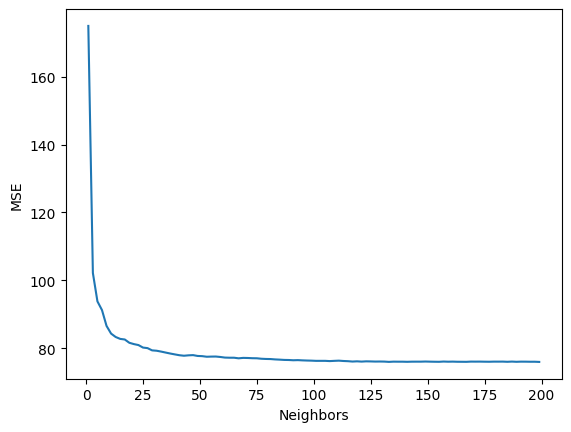

In [207]:
from sklearn.metrics import mean_squared_error

k_grid = [(2*k+1) for k in range(100)]
mses = []

for k in k_grid:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(u_train, y_train)
    y_hat = model.predict(u_test)
    mses.append(mean_squared_error(y_test, y_hat))

sns.lineplot(x=k_grid, y=mses).set(ylabel='MSE',xlabel='Neighbors')

In [208]:
index_star = np.argmin(mses)
k_star = k_grid[index_star]

print(k_star)

199


I chose k by evaluating k-NN models over a range of odd values of k, computing the mean squared error on a test split, and selecting the value of k that minimized the MSE.

### Q6, 5

In [211]:
airbnb_missing_reviews['Price'] = (airbnb_missing_reviews['Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float))

In [212]:
x_missing = airbnb_missing_reviews[['Price', 'Beds']]
u_missing = (x_missing - x.min()) / (x.max() - x.min())

In [213]:
model = KNeighborsRegressor(n_neighbors=k_star)
model.fit(u, y)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",199
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [214]:
u_missing = u_missing.dropna()
u_missing.isna().sum()

Price    0
Beds     0
dtype: int64

In [215]:
predicted_ratings = model.predict(u_missing)
airbnb_missing_reviews.loc[u_missing.index,'Predicted Review Scores Rating'] = predicted_ratings

### Q6, 6

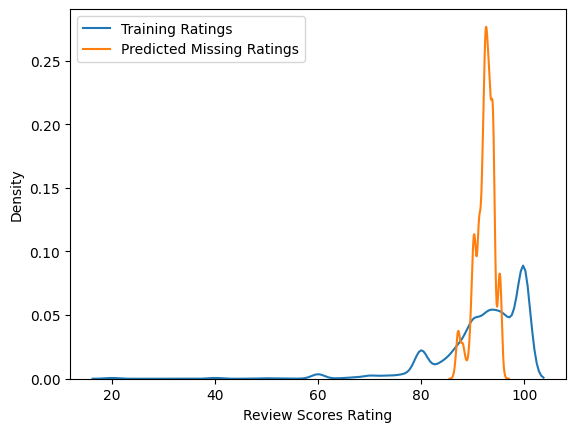

In [218]:
sns.kdeplot(y_train, label='Training Ratings')
sns.kdeplot(predicted_ratings, label='Predicted Missing Ratings')

plt.xlabel('Review Scores Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)